# **CosmiCode-Internship (Deep Learning)**

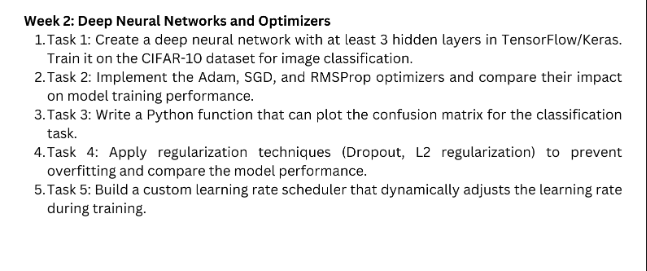

## Task 1: Deep Neural Network with 3 Hidden Layers on CIFAR-10

In this task, we will create a deep neural network with at least 3 hidden layers using TensorFlow and Keras. The model will be trained on the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. 

The architecture will include fully connected (Dense) layers and ReLU activations to classify the images into 10 categories. Finally, we will evaluate the model’s accuracy and loss on the test data.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input


# Loading CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()    # training data and its label in tuple, testing data and its label in a tuple
#   x_train: The images used for training the model.
#   y_train: The labels (true categories) for each training image.
#   x_test: The images used to evaluate the model after it’s trained.
#   y_test: The labels for each testing image.

print(x_train.shape)  # Should output (50000, 32, 32, 3)
print(x_test.shape)   # Should output (10000, 32, 32, 3)


# Normalize the data (make pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0
# The pixel values of the images are originally between 0 to 255. These values represent the intensity of the colors. (0 means black, 255 means white)
# Normalization means scaling the data between 0 and 1.
# Why?: It helps the model train more efficiently. Neural networks learn faster when the input data is within a similar small range.
# Gradient descent (which we use for training) works best when the data is scaled properly, otherwise, high-valued inputs can cause the gradients to explode or lead to slower convergence.
# 




# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# one-hot encoding is a way to represent categorical data numerically, we have several classes for images in CIFER-10 such as automobile, bird, etc etc.
# one-hot encoding would represent each class as a binary vector of length 10 (since we have 10 features).
# Example: If the true label is 2, the one-hot vector will be [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
# We are later going to use Categorical crossentropy loss which requires the labels to be in one-hot format to calculate how far the predicted probability is from the true class.

# Creating a Sequential model
model = Sequential()

# Input Layer + Flatten
model.add(Input(shape=(32, 32, 3))) # 32 height and 32 width of images in the dataset, with 3 color channels, red, green, blue. so its a 3D tensor, with 32 rows, 32 columns, and 3 color channels

model.add(Flatten())                # now, we need to make that 3D tensor, a 1D array, so the dense layers can process it, for this, we flatten (32*32*3 = 3072), now that is easily processable by the dense layers

# Hidden Layer 1
model.add(Dense(512, activation='relu'))    # activation function used to introduce non-linearity, relu basically sets all negative values to zero and helps prevent vanishing gradients

# Hidden Layer 2
model.add(Dense(256, activation='relu'))

# Hidden Layer 3
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))  # the output layer has 10 neurons because we have 10 classes, softmax activator is used to classification tasks when we wanna change values to probabilities

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # optimizers are used to update weights so loss function can be minimized, it is what helps the model "learn". loss functions measure how far off the model's predictions are compared to the actual value, categorical crossentropy is used for classification tasks mostly

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))  # epoch is one complete pass through the entire dataset. batch size is the number of samples to work through before updating the weights, so here the model processes 64 images and then updates the weights.
# if batch size not specified then it defaults to 32. If epochs not specified then it defaults to 1


(50000, 32, 32, 3)
(10000, 32, 32, 3)
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.2757 - loss: 2.0060 - val_accuracy: 0.3748 - val_loss: 1.7147
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3816 - loss: 1.7039 - val_accuracy: 0.4305 - val_loss: 1.5894
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.4263 - loss: 1.6033 - val_accuracy: 0.4229 - val_loss: 1.6231


**ReLU** in Hidden Layers: The hidden layers need to learn complex features, and ReLU helps by introducing non-linearity without being computationally expensive.<br/>
**Softmax** in Output Layer: We need probabilities for each class to decide which class the image belongs to. Softmax ensures that all output values sum to 1, effectively giving the likelihood of the image belonging to each class.<br/><br/>


The color channel is 3 because the images are RGB (Red, Green, Blue), which are the primary color channels used to represent colors digitally.<br/>
Logic: Each pixel has three values—red intensity, green intensity, and blue intensity. These three combine to represent the full range of colors. <br/>
Therefore, the 3rd dimension represents the color information for each pixel. <br/>
Each pixel, doesn't just have a position in height and width, it also has a color intensity associated with it, making it 3D instead of 2D

## Task 2: Implement Adam, SGD, and rmsprop optimizers and compare them

In [12]:
optimizers = ['adam', 'sgd', 'rmsprop'] # using different optimizers to see how they perform, nothing to really explain here ig
history_dict = {}

for opt in optimizers:
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(f"\nTraining with {opt.upper()} Optimizer")
    history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))
    history_dict[opt] = history



Training with ADAM Optimizer
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4474 - loss: 1.5450 - val_accuracy: 0.4574 - val_loss: 1.5290
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.4629 - loss: 1.4917 - val_accuracy: 0.4536 - val_loss: 1.5538
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4759 - loss: 1.4528 - val_accuracy: 0.4846 - val_loss: 1.4618

Training with SGD Optimizer
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5161 - loss: 1.3439 - val_accuracy: 0.5008 - val_loss: 1.4015
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5304 - loss: 1.3127 - val_accuracy: 0.5006 - val_loss: 1.4053
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5345 - loss: 1.3012 - val_accuracy: 0.5066 - val_loss: 1.3954

Training with RMSPROP Optimizer
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.4775 - loss: 1.4716 - val_accuracy: 0.4151 - val_loss: 1.6545
Epoch 2/3
7

## Task 3: Write a function to plot the confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


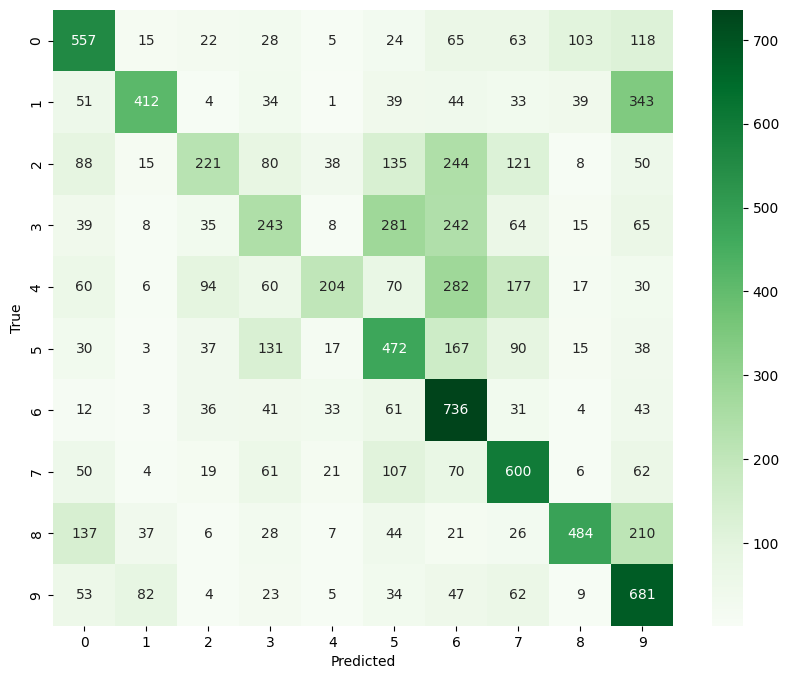

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    y_pred_classes = tf.argmax(y_pred, axis=1)  # we had previously one-hot encoded the class labels, now we will change it back to the original form for the plotting
    y_true_classes = tf.argmax(y_true, axis=1)
    
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Get model predictions
y_pred = model.predict(x_test)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)


## Task 4: Apply Regularization techniques like dropout and L2 regularization

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden Layer 1 with Dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Hidden Layer 2
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))

# Hidden Layer 3
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


c:\Users\junai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.1966 - loss: 2.7207 - val_accuracy: 0.3088 - val_loss: 2.0628
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.2495 - loss: 2.0922 - val_accuracy: 0.3188 - val_loss: 2.0314
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.2624 - loss: 2.0353 - val_accuracy: 0.2717 - val_loss: 2.0304


Regularization is a technique to reduce overfitting (working too well on the dataset but not being able to work well on unseen data). Regularization techniques are:
- Dropout: Use dropout in deep networks where there’s a high risk of overfitting. Dropping neurons forces the network to learn more generalized features.
- L2 Regularization: Apply L2 when you want to keep the weights small. It is useful when you suspect the model is overly relying on some specific features.


These techniques are typically used in the hidden layers but not the output layer, since the output layer needs to generate direct predictions and not drop random neurons.

## Task 5: Custom Learning rate Scheduler

In [16]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Compile and train with scheduler
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test), callbacks=[callback])


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.2796 - loss: 1.9732 - val_accuracy: 0.2829 - val_loss: 2.0760 - learning_rate: 0.0010
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.2827 - loss: 1.9770 - val_accuracy: 0.2713 - val_loss: 2.1019 - learning_rate: 0.0010
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.2893 - loss: 1.9697 - val_accuracy: 0.2776 - val_loss: 2.0436 - learning_rate: 0.0010


### Why is the accuracy so damn low still? how do we go about improving it?
- Firstly, we are only using 3 hidden layers, so increasing the number of hidden layers would help
- The epochs are set to 3 only whereas epochs are set to anywhere from 20-50 for deep learning models
- The batch size is set to 64, increasing it might also have an affect
- We already went over what affects changing the optimizers would have
- The dropout rate is set to 0.5 which might be too high

We can also use a CNN instead of a fully connected network to get better results<br/><br/><br/>

Lets use more hidden layers, more epochs, a bigger batch size, and the SGD optimizer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

better_model = Sequential()

# Input Layer + Flatten
better_model.add(Input(shape=(32, 32, 3)))

better_model.add(Flatten())


better_model.add(Dense(2048, activation='relu'))

better_model.add(Dense(1024, activation='relu'))

better_model.add(Dense(512, activation='relu'))

better_model.add(Dense(256, activation='relu'))

better_model.add(Dense(128, activation='relu'))

better_model.add(Dense(10, activation='softmax'))

better_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

better_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test)) 

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.2378 - loss: 2.1056 - val_accuracy: 0.3568 - val_loss: 1.8396
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.3561 - loss: 1.8148 - val_accuracy: 0.3662 - val_loss: 1.7934
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.3870 - loss: 1.7243 - val_accuracy: 0.4190 - val_loss: 1.6498
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.4082 - loss: 1.6705 - val_accuracy: 0.4166 - val_loss: 1.6403
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.4318 - loss: 1.6042 - val_accuracy: 0.4470 - val_loss: 1.5737
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.4456 - loss: 1.5685 - val_accuracy: 0.4498 - val_loss: 1.5345
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.4595 - loss: 1.5298 - val_accuracy: 0.4563 - val_loss: 1.5400
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4696 - loss: 1.5019 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

better_model = Sequential()

# Input Layer + Flatten
better_model.add(Input(shape=(32, 32, 3)))

better_model.add(Flatten())


better_model.add(Dense(2048, activation='relu'))

better_model.add(Dense(1024, activation='relu'))

better_model.add(Dense(512, activation='relu'))

better_model.add(Dense(256, activation='relu'))

better_model.add(Dense(128, activation='relu'))

better_model.add(Dense(10, activation='softmax'))

better_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

better_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test)) 

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 159ms/step - accuracy: 0.2206 - loss: 2.1566 - val_accuracy: 0.3822 - val_loss: 1.7201
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.3714 - loss: 1.7321 - val_accuracy: 0.4056 - val_loss: 1.6478
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 150ms/step - accuracy: 0.4083 - loss: 1.6455 - val_accuracy: 0.4325 - val_loss: 1.5872
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.4382 - loss: 1.5590 - val_accuracy: 0.4394 - val_loss: 1.5632
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 148ms/step - accuracy: 0.4610 - loss: 1.5021 - val_accuracy: 0.4685 - val_loss: 1.4978
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.4762 - loss: 1.4562 - val_accuracy: 0.4821 - val_loss: 1.4674
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.4934 - loss: 1.4113 - val_accuracy: 0.4826 - val_loss: 1.4529
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.4987 - loss: 1